# Running a single variable regression with L2 penalty

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv(r"Data/kc_house_data.csv")

train_data = df.sample(frac=0.8,random_state=0)
simple_feature_matrix = np.ones(shape = (train_data.shape[0], 2))
simple_feature_matrix[:,1] = train_data['sqft_living'].values
output = train_data['price'].values

theta = np.array([0., 0.])
step_size = 1e-12
l2_penalty_list = [0, 5e10, 7e11]
predictions_all = np.ones(shape = (train_data.shape[0], len(l2_penalty_list)))
for index, l2_penalty in enumerate(l2_penalty_list):
    for i in np.arange(1000):
        predictions = np.dot(simple_feature_matrix, theta)
        errors = output - predictions
        for w in np.arange(len(theta)):
            if w == 0:
                grad = -2*np.dot(errors, simple_feature_matrix[:, w])   
            else:
                grad = -2*np.dot(errors, simple_feature_matrix[:, w]) + 2*l2_penalty*theta[w]
            # theta[w] = theta[w] - step_size/len(predictions)*grad
            theta[w] = theta[w] - step_size*grad
    predictions_all[:,index] = np.dot(simple_feature_matrix, theta)
    print(l2_penalty) 
    print(*theta)

0
-0.15983127422940258 263.48613328634315
50000000000.0
6.343931935500091 169.09462093898347
700000000000.0
22.884762988022054 29.890202504002215


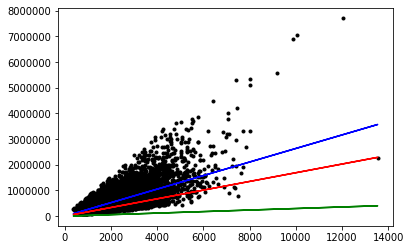

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_feature_matrix[:,1],output,'k.')
plt.plot(simple_feature_matrix[:,1],predictions_all[:,0],'b-')
plt.plot(simple_feature_matrix[:,1],predictions_all[:,1],'r-')
plt.plot(simple_feature_matrix[:,1],predictions_all[:,2],'g-')

# Running a multiple regression with L2 penalty

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv(r"Data/kc_house_data.csv")

train_data = df.sample(frac=0.8,random_state=0)
simple_feature_matrix = np.ones(shape = (train_data.shape[0], 3))
simple_feature_matrix[:,1:] = train_data[['sqft_living', 'bedrooms']].values
output = train_data['price'].values

theta = np.array([0., 0., 0.])
step_size = 1e-12
l2_penalty_list = [0, 5e10, 7e11]
predictions_all = np.ones(shape = (train_data.shape[0], len(l2_penalty_list)))
for index, l2_penalty in enumerate(l2_penalty_list):
    for i in np.arange(1000):
        predictions = np.dot(simple_feature_matrix, theta)
        errors = output - predictions
        for w in np.arange(len(theta)):
            if w == 0:
                grad = -2*np.dot(errors, simple_feature_matrix[:, w])   
            else:
                grad = -2*np.dot(errors, simple_feature_matrix[:, w]) + 2*l2_penalty*theta[w]
            # theta[w] = theta[w] - step_size/len(predictions)*grad
            theta[w] = theta[w] - step_size*grad
    predictions_all[:,index] = np.dot(simple_feature_matrix, theta)
    print(l2_penalty) 
    print(*theta)

0
-0.15982439482531552 263.48810863508123 -1.371738619653177
50000000000.0
6.343927779335174 169.0944089838286 0.22771212133011867
700000000000.0
22.88475441634369 29.890195577393182 0.04209932568179184


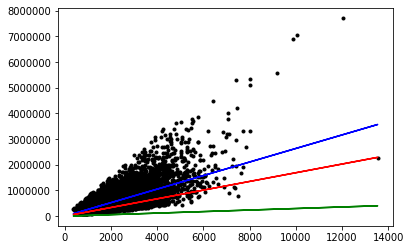

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_feature_matrix[:,1],output,'k.')
plt.plot(simple_feature_matrix[:,1],predictions_all[:,0],'b-')
plt.plot(simple_feature_matrix[:,1],predictions_all[:,1],'r-')
plt.plot(simple_feature_matrix[:,1],predictions_all[:,2],'g-')

### Note:
1. Divide by n : Only with division, it reduces the coefficients to near zero at high lambda
2. intercept and coefficients are updated separately because we dont want to shrink the intercept through ridge and make it zero.
3. If the error is calculated as y-pred, then as per derivative formula there will be a minus sign.
4. theta update will always go with - as with convex shape update.